In [1]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
import glob
import numpy as np
#from cartopy import config
import cartopy.crs as ccrs
import cartopy
from scipy.stats import linregress
import pandas as pd

In [2]:
files=sorted(glob.glob('/home/z5241410/Desktop/UNSW/Calipso_data/full_data/Map_OPAQ330m*.nc'))
ds=xr.open_mfdataset(files,combine='nested',concat_dim='time')

In [3]:
clt_opz=ds['cltcalipso_opaque_z']
opz=ds['zopaque']
diff=(clt_opz)-opz
cloudtop=(clt_opz)+diff

In [4]:
climatology=cloudtop.groupby('time.month').mean('time')
anomalies=cloudtop.groupby('time.month')-climatology

In [5]:
nino=np.array([24.86, 25.08,26.07, 26.83 ,27.09 ,27.04 ,26.99, 26.72 ,26.47 ,26.37 ,26.25, 25.74, 25.66 ,25.96 ,26.59 ,27.47 ,27.99 ,28.04 ,27.78 ,27.42 ,27.40 ,27.60 ,28.16, 28.34, 28.07 ,28.01 ,28.18 ,28.20 ,27.71 ,27.04 ,26.22 ,25.47 ,25.12 ,25.03 ,25.06, 25.00, 25.00 ,25.64 ,26.36 ,27.05 ,27.41 ,27.35 ,26.87 ,26.21 ,25.92 ,25.67 ,25.52, 25.54, 25.67 ,26.08 ,26.67 ,27.32 ,27.61 ,27.75 ,27.54 ,27.32 ,27.10 ,26.98 ,26.86, 26.34, 26.01 ,26.24 ,27.03 ,27.57 ,27.53 ,27.30 ,26.91 ,26.47 ,26.54 ,26.52 ,26.56, 26.43, 26.05 ,26.14 ,27.00 ,27.90 ,28.25 ,27.96 ,27.23 ,26.82 ,27.01 ,27.16 ,27.46 ,27.31, 27.05 ,27.17 ,27.75 ,28.52 ,28.85 ,28.90 ,28.75 ,28.79 ,28.93 ,29.08 ,29.42, 29.26, 29.11 ,28.90 ,28.72 ,28.23 ,27.69 ,26.82 ,26.28 ,26.14 ,25.98 ,25.94, 26.10, 26.12 ,26.67 ,27.32 ,28.03 ,28.30 ,28.06 ,27.54 ,26.70 ,26.29 ,26.15 ,25.74])

In [11]:
def point_regression(x):
    slope, intercept, rvalue, pvalue, stderr = linregress(nino,x)
    return [slope,intercept]


In [12]:
time_axis = 0
r = np.apply_along_axis(point_regression, time_axis, anomalies)
r

/home/z5241410/miniconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])

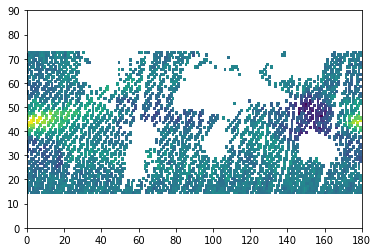

In [13]:
plt.pcolormesh(r[0,:,:])

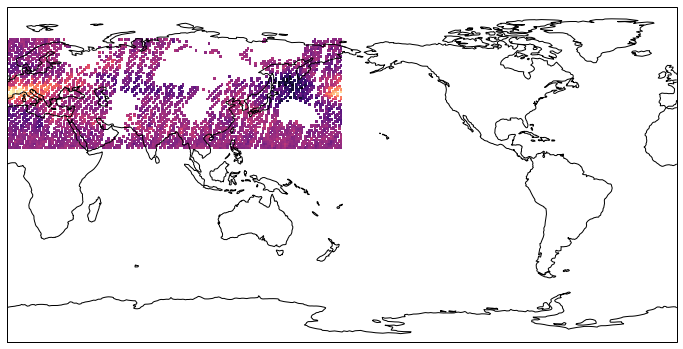

In [161]:
lon = np.linspace(-180, 180,180)
lat = np.linspace(-90, 90,90)
lon2d, lat2d = np.meshgrid(lon, lat)
plt.figure(figsize=(12,8))

ax=plt.subplot(1,1, 1,projection=ccrs.PlateCarree(central_longitude=180.0))
ax.coastlines()
ax.set_global()

#y1.plot(cmap=plt.cm.get_cmap('RdBu', 6),transform=ccrs.PlateCarree(),vmin=-6, vmax=6,cbar_kwargs={'extend':'both','ticks':[-6,-5,-4,-3,-2,-1,0, 1, 2, 3, 4, 5,6]})
#plt.title('2008',size=15)

plt.pcolormesh(r[0,:,:],cmap='magma',transform=ccrs.PlateCarree())

In [130]:
anomalies
latitude=anomalies['latitude']
longitude=anomalies['longitude']
anomalies

,Array,Chunk
Bytes,7.65 MB,64.80 kB
Shape,"(118, 90, 180)","(1, 90, 180)"
Count,1618 Tasks,118 Chunks
Type,float32,numpy.ndarray


In [72]:
r.shape

(2, 90, 180)

In [160]:
r1=xr.DataArray(data=r[0,:,:])
new=xr.DataArray(data=r1,coords=[latitude,longitude],dims=['latitude','longitude'])
new

<xarray.DataArray (latitude: 90, longitude: 180)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * latitude   (latitude) float32 -89.0 -87.0 -85.0 -83.0 ... 85.0 87.0 89.0
  * longitude  (longitude) float32 -179.0 -177.0 -175.0 ... 175.0 177.0 179.0

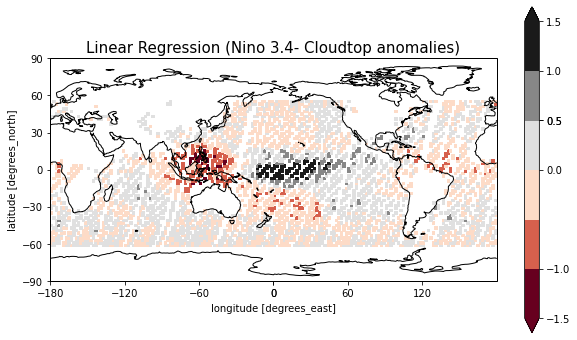

In [159]:
lon = np.linspace(-180, 180,180)
lat = np.linspace(-90, 90,90)
lon2d, lat2d = np.meshgrid(lon, lat)
plt.figure(figsize=(10,6))

ax=plt.subplot(1,1, 1,projection=ccrs.PlateCarree(central_longitude=180.0))
ax.coastlines()
ax.set_global()
ax.set_xticks([-180,-120,-60,0,60,120,180], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())

new.plot(cmap=plt.cm.get_cmap('RdGy', 6),transform=ccrs.PlateCarree(),vmin=-1.5, vmax=1.5,cbar_kwargs={'extend':'both','ticks':[-1.5,-1,0.5,0,0.5, 1, 1.5]})
plt.title('Linear Regression (Nino 3.4- Cloudtop anomalies)',size=15)

plt.savefig('lin_regress.png', dpi=300, bbox_inches='tight')

